<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_06/Text_Representation_and_Embedding_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 표현 기법과 임베딩
# **Data Representation**

## <font color='orange'>**4. Text data**
- **아래 그림을 이해하여야 한다.**
<img src='http://jalammar.github.io/images/numpy/numpy-nlp-embeddings.png'>
<img src='http://jalammar.github.io/images/numpy/numpy-nlp-bert-shape.png'>


#### 2.5 Word Embedding
- 의미 기반 분산 표현 (Distributed Representation)
- Word2Vec, GloVe, FastText 등
- 단어 간 유사도, 의미 추론 가능
- CBOW / Skip-gram
- https://word2vec.kr/search

In [5]:
!pip install numpy==1.23.5 gensim==4.3.0 --force-reinstall --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509

In [7]:
!pip install scipy==1.11.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.3 MB/s eta 0:00:00
Reason for being yanked: License Violation
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 32.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.11.0 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.11.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatib

### **[Gensim](https://radimrehurek.com/gensim/)**

In [7]:
import numpy as np
import pandas as pd
import re
from gensim.models import Word2Vec

# NLTK 데이터 다운로드
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.corpus import gutenberg
# 필요한 리소스를 다운로드
nltk.download('gutenberg')
# 구텐베르크 말뭉치에서 사용 가능한 파일 목록 출력
file_ids = gutenberg.fileids()
file_ids

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [53]:
# 1. 텍스트 로드
raw_text = gutenberg.raw('bible-kjv.txt')
raw_text[:100]

'[The King James Bible]\n\nThe Old Testament of the King James Bible\n\nThe First Book of Moses:  Called '

In [41]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [49]:
raw_text[:2]

'[T'

In [61]:
# 2. 문장 단위로 분리 후, 각 문장을 단어 단위로 토큰화
sentences = sent_tokenize(raw_text[:1000])  # 문장 단위 분리
sentences[0]

'[The King James Bible]\n\nThe Old Testament of the King James Bible\n\nThe First Book of Moses:  Called Genesis\n\n\n1:1 In the beginning God created the heaven and the earth.'

In [63]:
# prompt: raw_text에 불용어, 특수문자, 줄바꿈, 번호 등을 모두 제거하는 전처리 코드, 단 마침표는 제거하지마라

import re

def preprocess_text(text):
  # 특수문자 제거 (마침표 제외)
  text = re.sub(r"[^a-zA-Z0-9\. ]", "", text)

  # 줄바꿈 제거
  text = text.replace('\n', ' ')

  # 번호 제거
  text = re.sub(r'\d+', '', text)

  # 불용어 제거
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  words = [word for word in words if word.lower() not in stop_words]

  # 공백 제거 및 단어 합치기
  text = " ".join(words)

  return text

# 전처리 적용
processed_text = preprocess_text(raw_text)
print(processed_text[:100])


King James BibleThe Old Testament King James BibleThe First Book Moses Called Genesis beginning God 


In [64]:
sentences = sent_tokenize(preprocess_text(raw_text))  # 문장 단위 분리
sentences[0]

'King James BibleThe Old Testament King James BibleThe First Book Moses Called Genesis beginning God created heaven earth .'

In [66]:
len(sentences)

25886

In [65]:
tokenized_sentences = [word_tokenize(sent.lower()) for sent in sentences]  # 단어 단위 토큰화 + 소문자
tokenized_sentences[0]

['king',
 'james',
 'biblethe',
 'old',
 'testament',
 'king',
 'james',
 'biblethe',
 'first',
 'book',
 'moses',
 'called',
 'genesis',
 'beginning',
 'god',
 'created',
 'heaven',
 'earth',
 '.']

In [67]:
# prompt: tokenized_sentences에서 마침표를 제거
tokenized_sentences = [[word for word in sent if word != '.'] for sent in tokenized_sentences]
tokenized_sentences[0]


['king',
 'james',
 'biblethe',
 'old',
 'testament',
 'king',
 'james',
 'biblethe',
 'first',
 'book',
 'moses',
 'called',
 'genesis',
 'beginning',
 'god',
 'created',
 'heaven',
 'earth']

In [68]:
# 3. Word2Vec 모델 학습

# 파라미터 설명:
# - size: 단어 벡터의 차원 수
# - window: 컨텍스트 윈도우 크기
# - min_count: 단어 최소 등장 횟수 기준
# - sg: 0은 CBOW, 1은 Skip-gram
# - workers: 병렬 처리를 위한 스레드 수

model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,    # 벡터 차원
    window=5,           # 컨텍스트 윈도우 크기
    min_count=5,        # 최소 등장 빈도
    workers=4,          # 병렬 처리
    sg=1                # skip-gram 사용 (sg=0은 CBOW)
)

In [69]:
# 4. 단어 벡터 확인 예제
print("📌 Vector for 'god':\n", model.wv['god'])

📌 Vector for 'god':
 [-1.83175817e-01  3.46206039e-01 -7.39468932e-02 -3.51215094e-01
  4.44024682e-01  2.03566253e-01  1.23753771e-01  2.68102825e-01
 -1.15493998e-01  5.62823005e-02 -2.54103035e-01  2.00126186e-01
 -8.90039057e-02 -8.07309598e-02  1.70096457e-01 -1.30468577e-01
 -6.46303669e-02  6.10000677e-02 -5.19173928e-02 -1.21552318e-01
 -8.93877819e-02  2.61624381e-02  9.55621600e-01  2.86452770e-02
  4.04354304e-01  7.34305382e-02 -1.97309434e-01  1.95189536e-01
 -1.23181090e-01  2.20738113e-01  3.67704421e-01  4.54791114e-02
 -1.32238969e-01 -2.98004001e-01  1.13861449e-01  2.68910795e-01
 -1.42598897e-01  7.91863650e-02 -1.16739005e-01 -1.91983819e-01
  1.56957909e-01 -3.68516326e-01  3.48782837e-02 -1.33899401e-03
  1.02742665e-01  4.72110845e-02 -2.26653546e-01 -1.75616238e-02
  1.01188742e-01 -6.19252473e-02  4.48323905e-01 -2.29164809e-01
  2.90886253e-01 -2.51268834e-01 -1.97808400e-01 -7.06067542e-03
  1.58105507e-01  2.44959295e-02 -2.04854414e-01 -3.88275683e-01
 -1.

In [71]:
# 모델의 파라미터 출력
print(model.wv.vectors.shape) # 벡터의 차원 확인
print(model.wv.key_to_index) # 단어 목록과 인덱스 확인
print(model.wv.index_to_key) # 인덱스와 단어 목록 확인

(6196, 100)
{'shall': 0, 'unto': 1, 'lord': 2, 'thou': 3, 'god': 4, 'thy': 5, 'said': 6, 'ye': 7, 'thee': 8, 'upon': 9, 'man': 10, 'israel': 11, 'son': 12, 'king': 13, 'hath': 14, 'came': 15, 'people': 16, 'come': 17, 'house': 18, 'one': 19, 'also': 20, 'day': 21, 'children': 22, 'land': 23, 'men': 24, 'let': 25, 'shalt': 26, 'go': 27, 'hand': 28, 'us': 29, 'went': 30, 'made': 31, 'saying': 32, 'even': 33, 'behold': 34, 'saith': 35, 'therefore': 36, 'every': 37, 'sons': 38, 'things': 39, 'say': 40, 'make': 41, 'may': 42, 'david': 43, 'hast': 44, 'earth': 45, 'jesus': 46, 'father': 47, 'put': 48, 'name': 49, 'among': 50, 'away': 51, 'great': 52, 'thine': 53, 'pass': 54, 'moses': 55, 'days': 56, 'take': 57, 'forth': 58, 'brought': 59, 'city': 60, 'give': 61, 'thereof': 62, 'heart': 63, 'neither': 64, 'two': 65, 'judah': 66, 'know': 67, 'took': 68, 'thus': 69, 'according': 70, 'jerusalem': 71, 'good': 72, 'bring': 73, 'word': 74, 'yet': 75, 'set': 76, 'offering': 77, 'sent': 78, 'way': 79

In [72]:
model.corpus_total_words

372954

In [73]:
model.vector_size

100

In [74]:
# 모델 저장 및 로드 방법
model.save("word2vec_model.model")
loaded_model = Word2Vec.load("word2vec_model.model")

In [75]:
# 5. 유사한 단어 확인
print("\n🔍 Most similar words to 'god':")
for word, score in model.wv.most_similar('god'):
    print(f"{word}: {score:.4f}")


🔍 Most similar words to 'god':
godof: 0.8074
praises: 0.8020
redeemer: 0.7968
thegod: 0.7919
ofhosts: 0.7848
jealous: 0.7810
formed: 0.7806
theworld: 0.7804
magnified: 0.7786
saviour: 0.7780


In [94]:
print("Vector for 'jesus':", model.wv['jesus'])

Vector for 'jesus': [ 0.23893891  0.10646108 -0.15142639 -0.66373193  0.39694518  0.59795433
  0.07369848  0.4522705   0.10081548  0.07530855 -0.26330596  0.26032674
  0.25162727 -0.00914854 -0.4155177  -0.10374155 -0.24688992  0.01729673
  0.20580952 -0.15667464 -0.44914758  0.28085083  0.9180792  -0.06547912
  0.18671657  0.17275743 -0.09065846 -0.12764177 -0.07852051 -0.23008
 -0.13781728 -0.15573478  0.18284704 -0.29871893 -0.1807298  -0.08531367
 -0.1382451  -0.2469163  -0.5499579  -0.39226237  0.07398558 -0.40629318
  0.04490327 -0.2619833   0.20581183 -0.344988    0.10610641 -0.13926408
 -0.48153174 -0.274845   -0.01763682 -0.4570014  -0.15721774 -0.46455717
 -0.17173707 -0.8593542   0.11126149 -0.04248852 -0.5757159  -0.39369622
  0.20340653 -0.36493307  0.31795576  0.04556601  0.38075113  0.67530125
 -0.16367224  0.01147797 -0.37334862  0.08169524  0.07449363  0.6377994
  0.58391815 -0.03366947  0.42298773  0.0731601   0.08685243  0.6037907
 -0.13305733  0.15888254 -0.21532166

In [95]:
print("Similarity between 'jesus' and 'god':", model.wv.similarity('jesus', 'god'))

Similarity between 'jesus' and 'god': 0.49047282


In [97]:
print("Similarity between 'jesus' and 'father':", model.wv.similarity('jesus', 'father'))

Similarity between 'jesus' and 'god': 0.475645


In [99]:
print("Similarity between 'jesus' and 'satan':", model.wv.similarity('jesus', 'satan'))

Similarity between 'jesus' and 'satan': 0.61130685


In [96]:
print("Most similar to 'jesus':", model.wv.most_similar('jesus', topn=3))

Most similar to 'jesus': [('paul', 0.7495927810668945), ('christ', 0.7461450099945068), ('baptized', 0.7094739675521851)]


In [100]:
# prompt: 출현빈도가 높은 상위 10개 단어의 cosine similarity table을

import pandas as pd
import numpy as np
from collections import Counter

# 단어 빈도수 계산
word_counts = Counter(word for sentence in tokenized_sentences for word in sentence)

# 상위 10개 단어 추출
top_10_words = [word for word, count in word_counts.most_common(10)]

# 코사인 유사도 계산 및 표 생성
similarity_matrix = np.zeros((10, 10))
for i, word1 in enumerate(top_10_words):
    for j, word2 in enumerate(top_10_words):
        similarity_matrix[i, j] = model.wv.similarity(word1, word2)

similarity_df = pd.DataFrame(similarity_matrix, index=top_10_words, columns=top_10_words)
similarity_df

,shall,unto,lord,thou,god,thy,said,ye,thee,upon
shall,1.000000,0.347058,0.286042,0.291910,0.320114,0.362227,0.159718,0.521556,0.405590,0.401825
unto,0.347058,1.000000,0.582597,0.477630,0.607961,0.358953,0.504632,0.432802,0.577086,0.323594
lord,0.286042,0.582597,1.000000,0.402066,0.755067,0.425490,0.316047,0.468993,0.528070,0.400527
thou,0.291910,0.477630,0.402066,1.000000,0.362369,0.580043,0.450984,0.319638,0.686135,0.227132
god,0.320114,0.607961,0.755067,0.362369,1.000000,0.413420,0.402794,0.545365,0.601285,0.309736
thy,0.362227,0.358953,0.425490,0.580043,0.413420,1.000000,0.218545,0.328385,0.743806,0.406987
said,0.159718,0.504632,0.316047,0.450984,0.402794,0.218545,1.000000,0.300731,0.434214,0.154889
ye,0.521556,0.432802,0.468993,0.319638,0.545365,0.328385,0.300731,1.000000,0.440019,0.107826
thee,0.405590,0.577086,0.528070,0.686135,0.601285,0.743806,0.434214,0.440019,1.000000,0.355386
upon,0.401825,0.323594,0.400527,0.227132,0.309736,0.406987,0.154889,0.107826,0.355386,1.000000


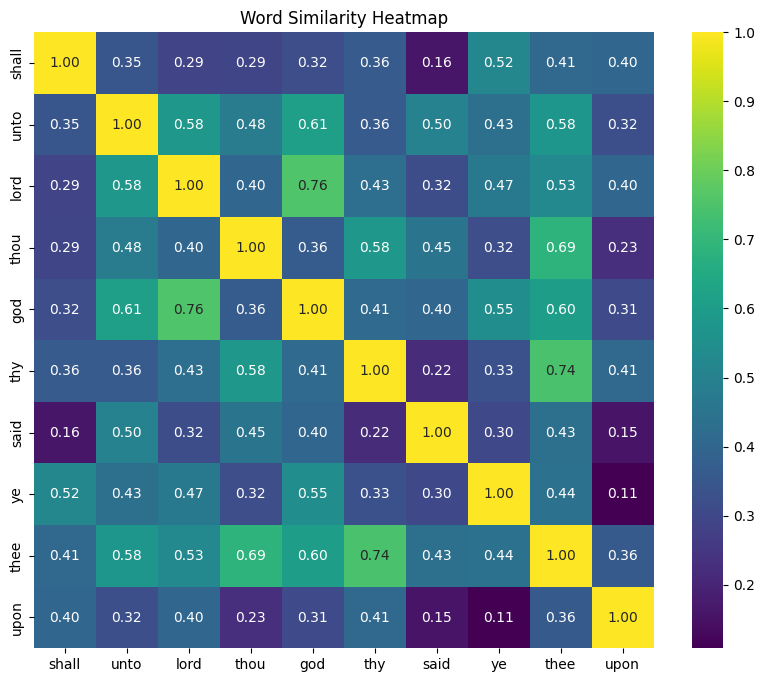

In [101]:
# prompt: similarity_df를 heatmap

# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# sns.heatmap(similarity_df, annot=True, cmap='viridis', fmt=".2f")
# plt.title('Word Similarity Heatmap')
# plt.show()


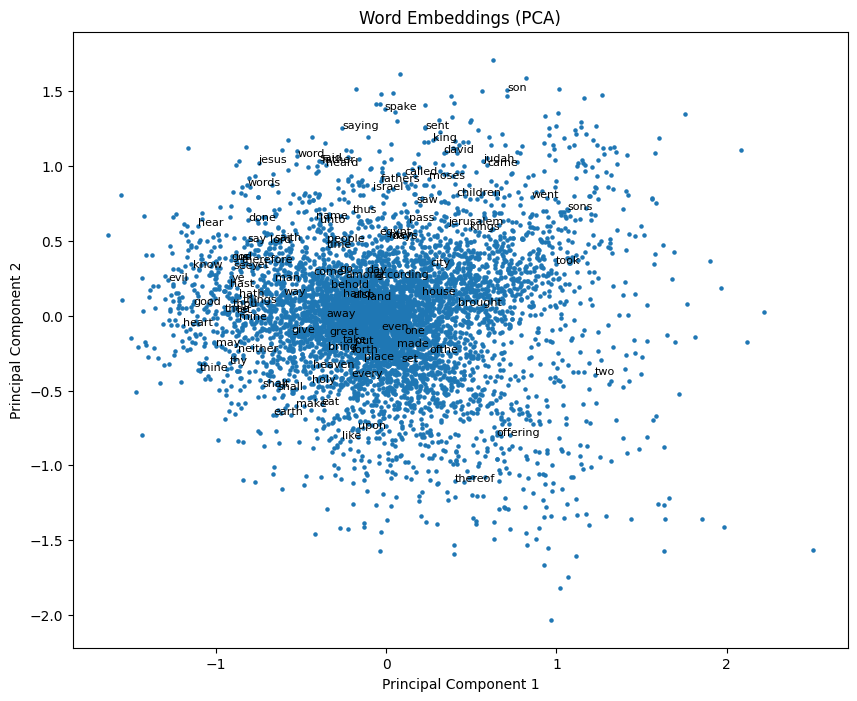

In [106]:
# prompt: 100차원의 단어를 주성분분석 2차원으로 차원축소하여 시각화해줘

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(model.wv.vectors)

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)

# 단어 레이블 추가 (단어 개수가 많으면 레이블을 모두 표시하지 않을 수 있습니다)
# ✅ Change: Get the first 1000 words from the index_to_key list
words = list(model.wv.index_to_key)[:100]
for i, word in enumerate(words):
    plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]), fontsize=8)
plt.title('Word Embeddings (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [108]:
# prompt: 100차원의 단어를 주성분분석 3차원으로 차원축소하여 plotly 로 시각화해줘

import plotly.graph_objs as go
from sklearn.decomposition import PCA

# PCA를 사용하여 3차원으로 차원 축소
pca = PCA(n_components=3)
X_pca = pca.fit_transform(model.wv.vectors)

# Plotly를 사용한 3D 시각화
fig = go.Figure()

# ✅ Change: Get the first 1000 words from the index_to_key list
words = list(model.wv.index_to_key)[:100]
for i, word in enumerate(words):
    fig.add_trace(go.Scatter3d(
        x=[X_pca[i, 0]],
        y=[X_pca[i, 1]],
        z=[X_pca[i, 2]],
        mode='markers+text',
        text=[word],
        textposition="top center",
        marker=dict(size=5)
    ))

fig.update_layout(title='Word Embeddings (PCA 3D)',
                  scene=dict(xaxis_title='Principal Component 1',
                             yaxis_title='Principal Component 2',
                             zaxis_title='Principal Component 3'))

fig.show()


## **[tensorflow projector](https://projector.tensorflow.org/)**
### 시각화를 해보시오 > Load 텝에서 데이터 확인하고 동일한 유형의 데이터를 만들기
- ✅ Word2Vec → TSV 변환 코드 (vector + metadata 파일 만들기)
아래 코드를 실행하면, 1) 벡터.tsv, 2) 메타데이터.tsv 두 파일이 생성되고, 이를 Embedding Projector에 업로드하면 돼.
- 🔄 파일 업로드 순서 (Embedding Projector에서)

>> Step 1에 업로드: vectors.tsv

>> Step 2에 업로드: metadata.tsv

>> "Load" 누르면 시각화 가능

In [79]:
model.wv.index_to_key[:10]

['shall', 'unto', 'lord', 'thou', 'god', 'thy', 'said', 'ye', 'thee', 'upon']

In [88]:
len(model.wv.index_to_key)  # 전체 단어 개 수

6196

In [82]:
# 모델에서 vocab 단어 추출
words = list(model.wv.index_to_key)

# Embedding 벡터 추출
vectors = np.array([model.wv[word] for word in words])

# 1. 벡터 저장 (vectors.tsv)
np.savetxt("vectors.tsv", vectors, delimiter='\t')

# 2. 메타데이터 저장 (metadata.tsv)
# ✅ 수정된 metadata.tsv 생성 코드
with open("metadata.tsv", "w", encoding="utf-8") as f:
    for word in words:
        f.write(f"{word}\n")

In [84]:
print("벡터 수:", len(vectors))
print("메타데이터 수:", len(words))

벡터 수: 6196
메타데이터 수: 6196


In [83]:
from google.colab import files
files.download("vectors.tsv")
files.download("metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>